In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 2.3.3
numpy version: 2.2.6
seaborn version: 0.13.2


In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
159,160,Female,30,78,73
42,43,Male,48,39,36
97,98,Female,27,60,50
47,48,Female,27,40,47
111,112,Female,19,63,54
109,110,Male,66,63,48
5,6,Female,22,17,76
191,192,Female,32,103,69
49,50,Female,31,40,42
73,74,Female,60,50,56


In [ ]:
mall_data.describe()

In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\1603667923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\1603667923.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

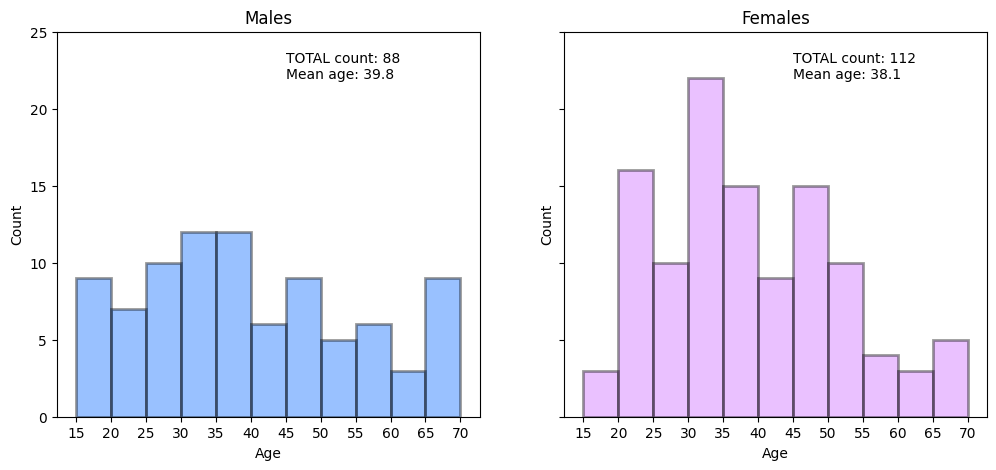

In [6]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [7]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


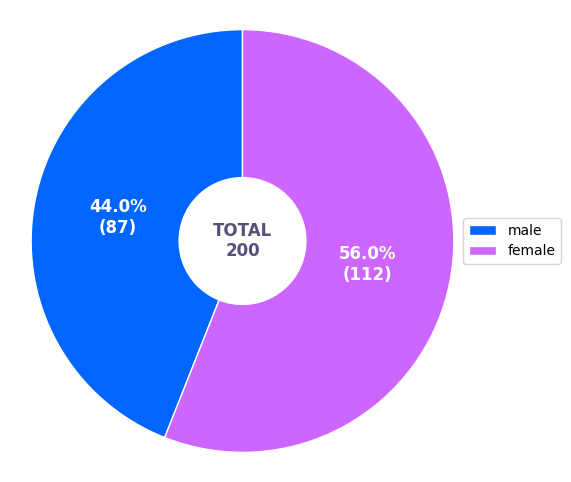

In [8]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\1925565421.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\1925565421.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

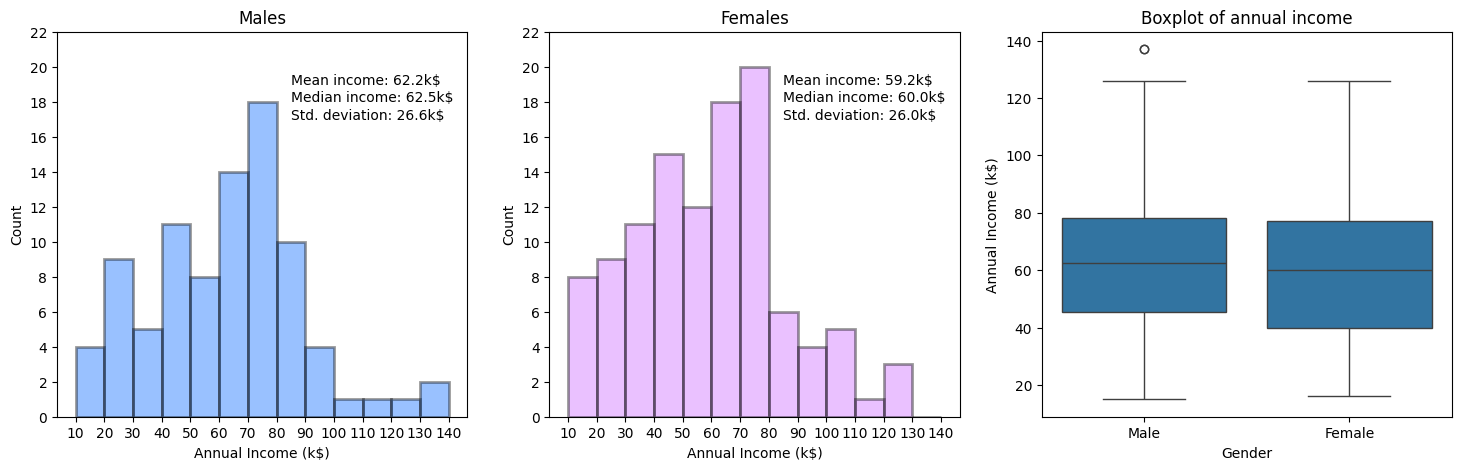

In [9]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [10]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\3959129858.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\3959129858.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

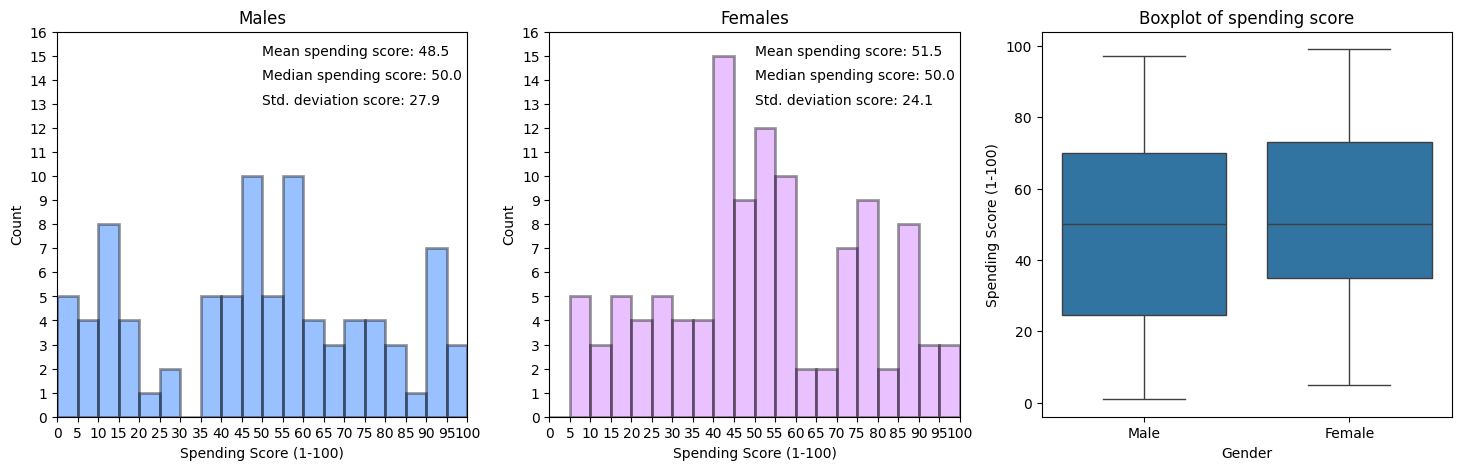

In [11]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


In [13]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

C:\Users\AZubochenko\AppData\Local\Temp\ipykernel_37024\1980378868.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()


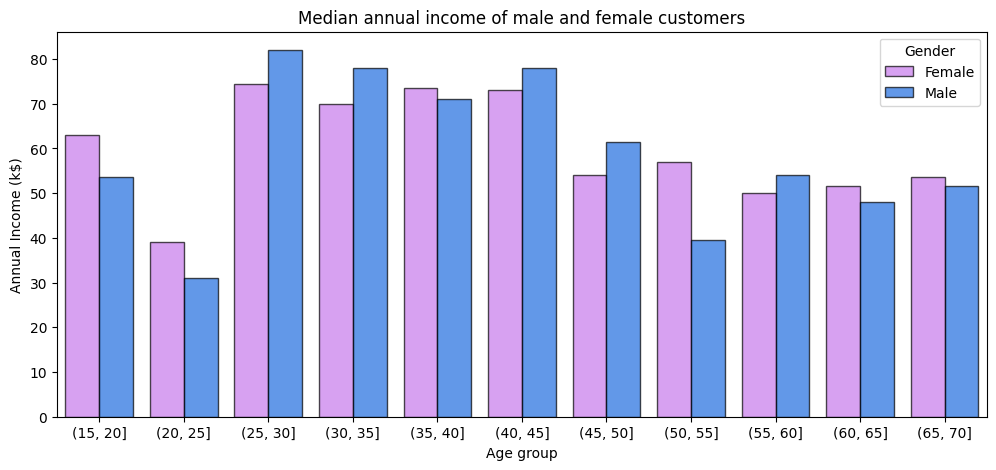

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

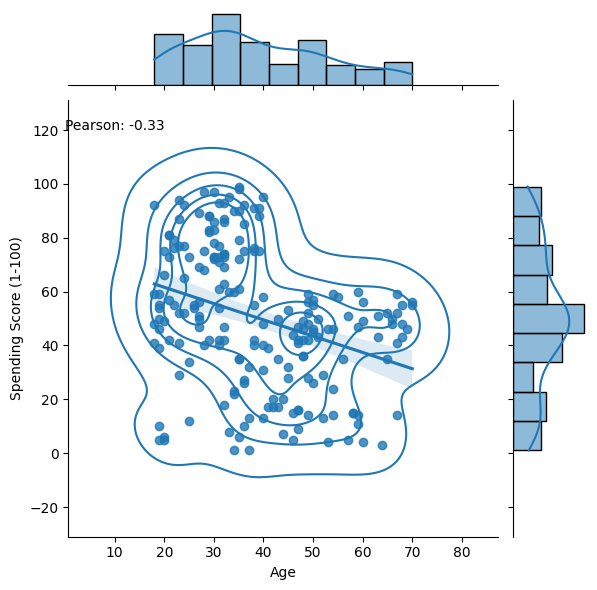

In [15]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# вычисляем корреляцию Пирсона
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

# строим jointplot с регрессией и KDE
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0, 120, f'Pearson: {corr:.2f}')

plt.show()

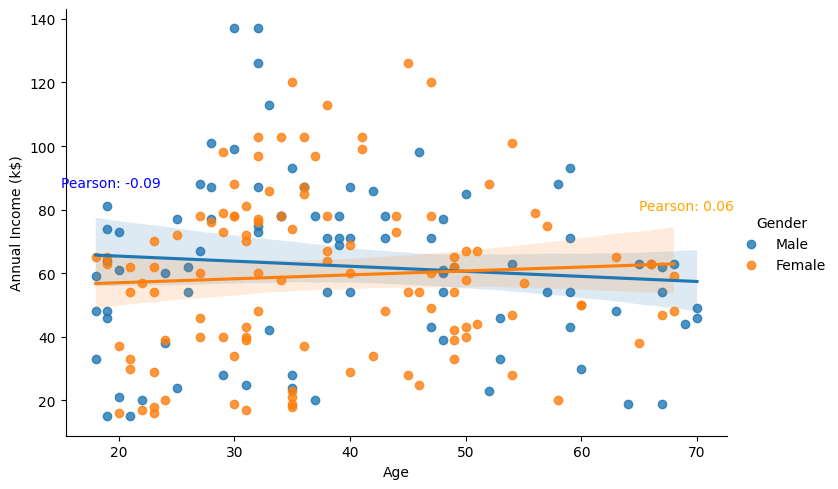

In [16]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# вычисляем корреляции Пирсона по группам
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

# строим lmplot с разделением по полу
sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)

# добавляем текст с коэффициентами корреляции (подбирайте координаты под ваши данные)
plt.text(15, 87, f'Pearson: {corr1:.2f}', color='blue')
plt.text(65, 80, f'Pearson: {corr2:.2f}', color='orange')

plt.show()

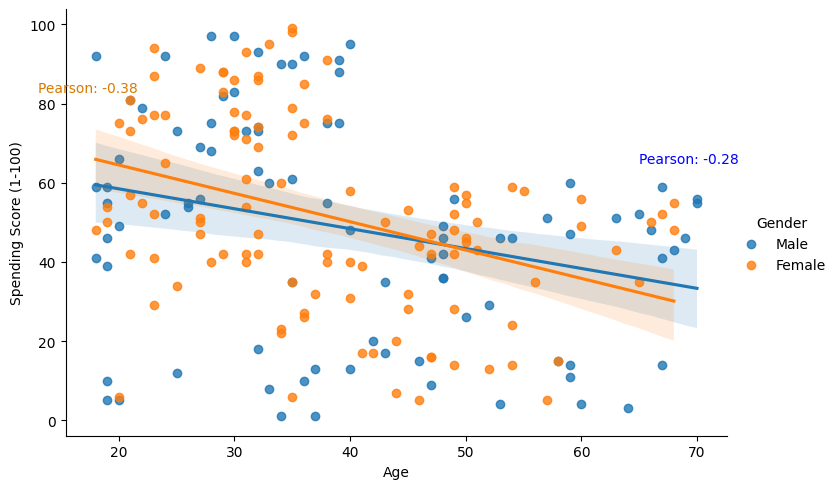

In [17]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# вычисляем корреляции Пирсона для мужчин и женщин
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

# строим lmplot с разделением по полу
sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

# добавляем текст с коэффициентами корреляции (подбирайте координаты под ваши данные)
plt.text(65, 65, f'Pearson: {corr1:.2f}', color='blue')
plt.text(13, 83, f'Pearson: {corr2:.2f}', color='#d97900')

plt.show()


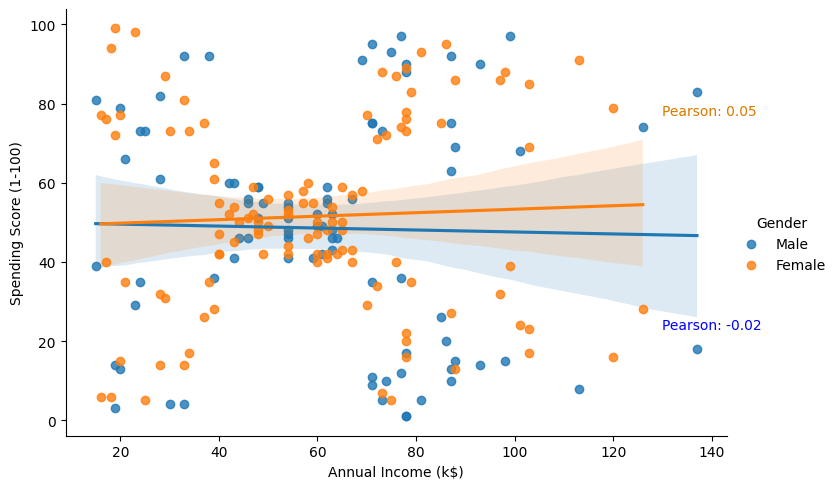

In [18]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# вычисляем корреляции Пирсона для мужчин и женщин
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

# строим lmplot с разделением по полу
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

# добавляем текст с коэффициентами корреляции (координаты можно подстроить под ваши данные)
plt.text(130, 23, f'Pearson: {corr1:.2f}', color='blue')
plt.text(130, 77, f'Pearson: {corr2:.2f}', color='#d97900')

plt.show()


In [19]:
from sklearn.cluster import KMeans 

In [20]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

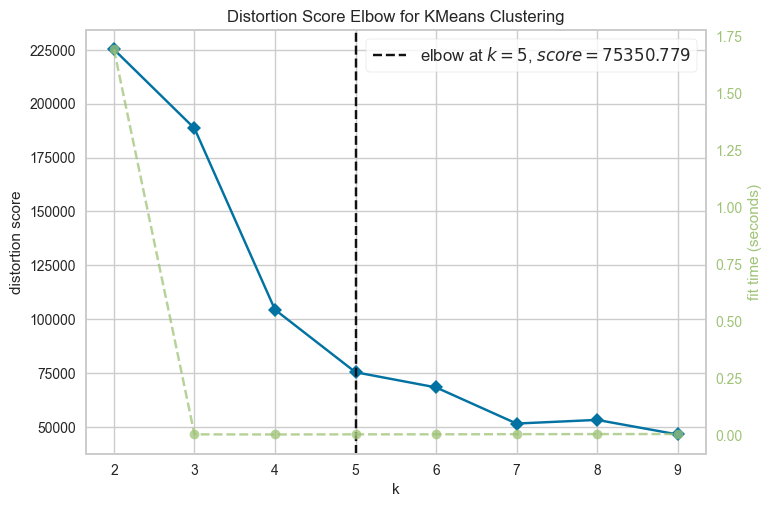

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

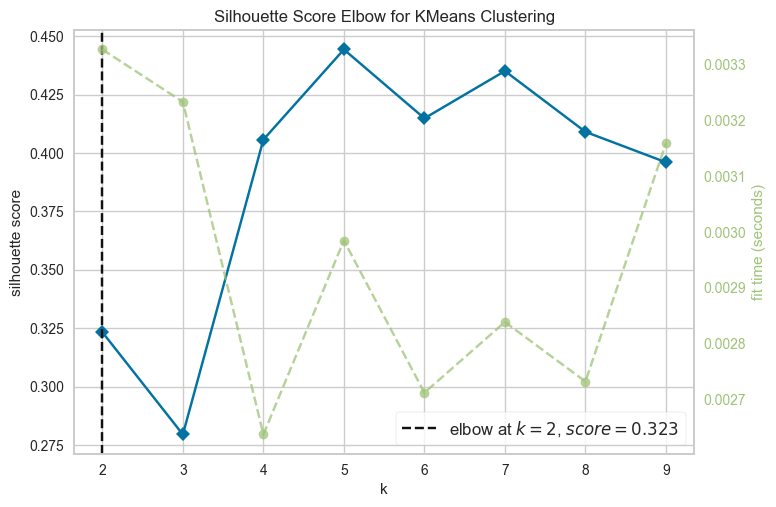

In [22]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [24]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

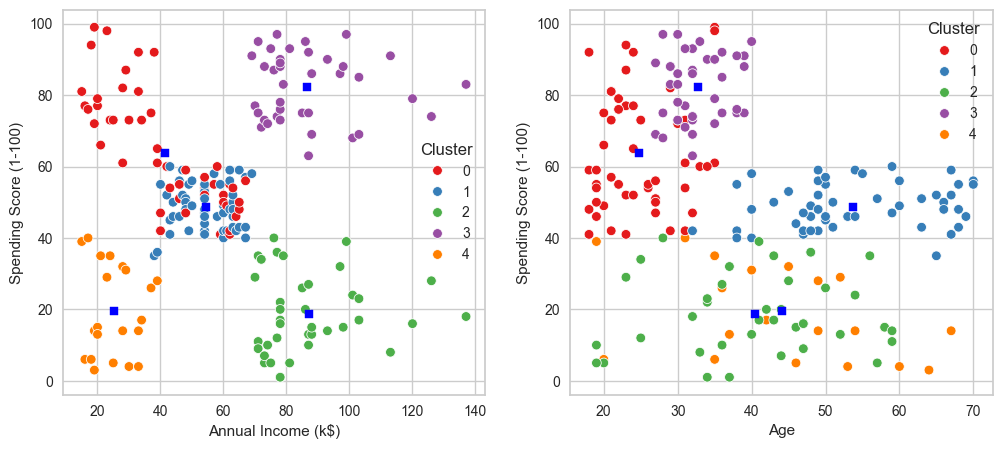

In [25]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Annual Income vs Spending Score
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=KM5_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[0],
    legend='full'
)

# Age vs Spending Score
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=KM5_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[1],
    legend='full'
)

# центроиды кластеров
axes[0].scatter(
    KM_5_clusters.cluster_centers_[:, 1],
    KM_5_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

axes[1].scatter(
    KM_5_clusters.cluster_centers_[:, 0],
    KM_5_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

plt.show()


In [26]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,50
1,52
2,38
3,39
4,21


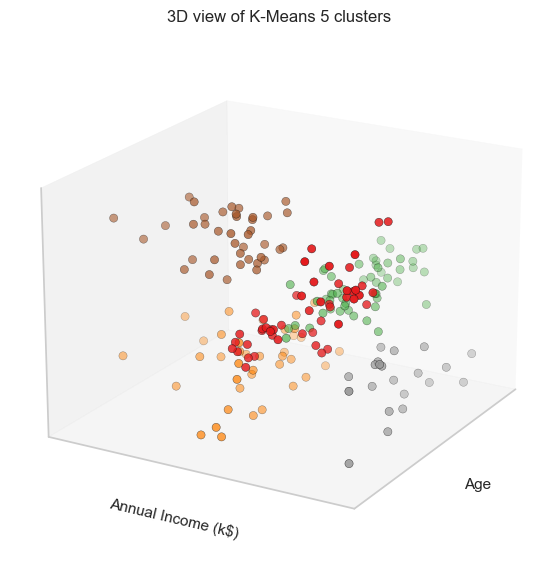

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    KM5_clustered['Age'],
    KM5_clustered['Annual Income (k$)'],
    KM5_clustered['Spending Score (1-100)'],
    c=KM5_clustered['Cluster'],
    s=35,
    edgecolor='k',
    cmap=plt.cm.Set1
)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')

ax.view_init(elev=20, azim=210)

plt.show()


In [28]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

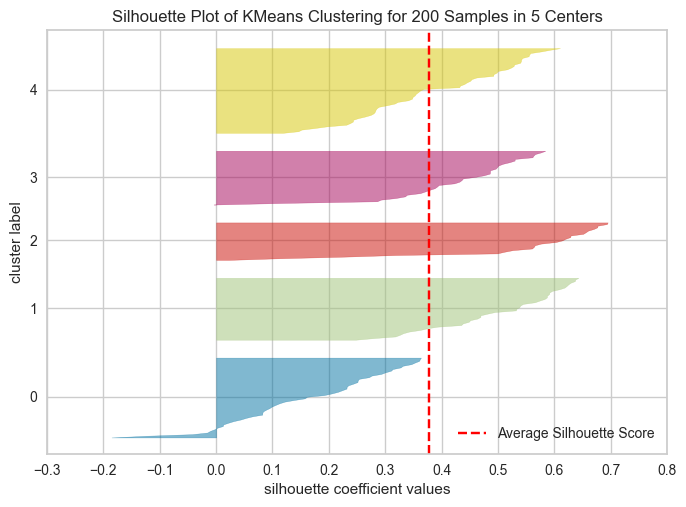

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [30]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

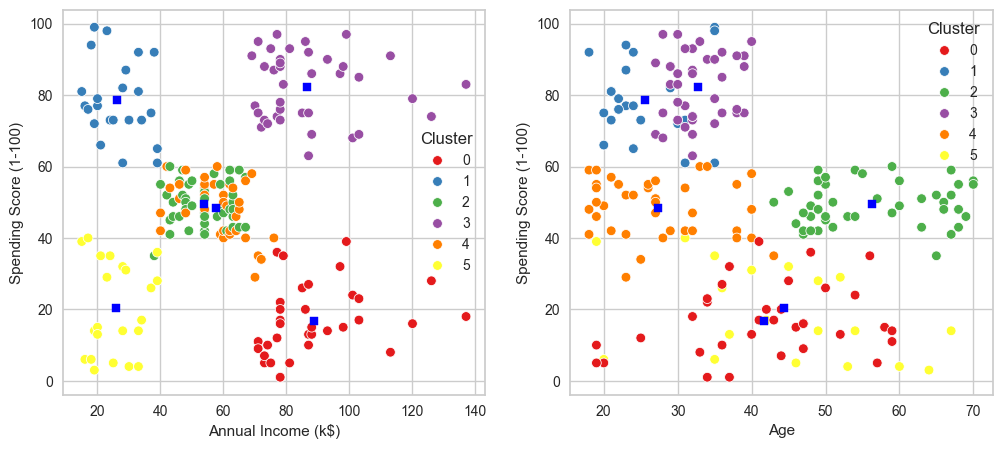

In [31]:
fig11, axes = plt.subplots(1, 2, figsize=(12, 5))

# Annual Income vs Spending Score
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=KM6_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[0],
    legend='full'
)

# Age vs Spending Score
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=KM6_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[1],
    legend='full'
)

# plotting centroids
axes[0].scatter(
    KM_6_clusters.cluster_centers_[:, 1],
    KM_6_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

axes[1].scatter(
    KM_6_clusters.cluster_centers_[:, 0],
    KM_6_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

plt.show()


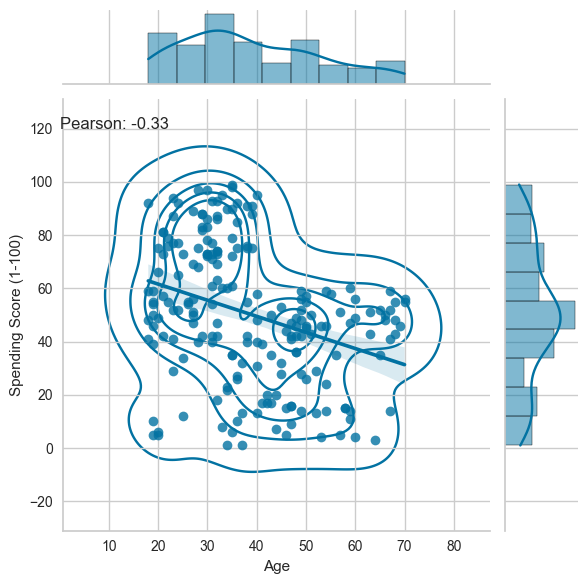

In [32]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# вычисляем корреляцию Пирсона
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

# строим jointplot с регрессией и KDE
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0, 120, f'Pearson: {corr:.2f}')

plt.show()

In [33]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,34
1,23
2,44
3,39
4,38
5,22


In [34]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

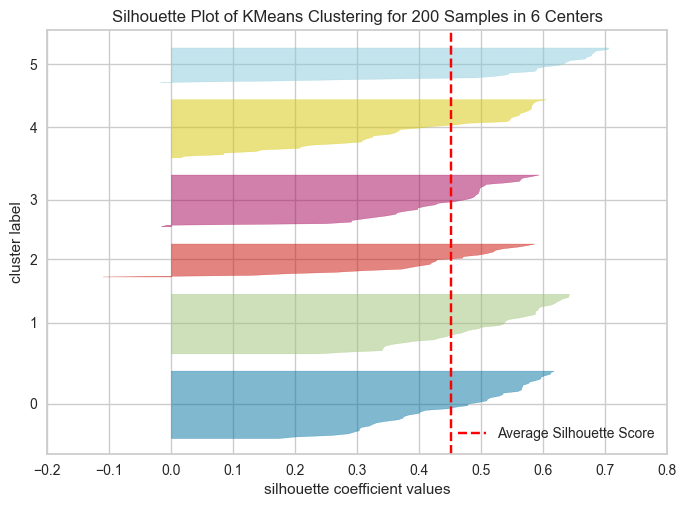

In [35]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [39]:
KM_7_clusters = KMeans(n_clusters=7, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM_7_clustered = X_numerics.copy()
KM_7_clustered.loc[:,'Cluster'] = KM_7_clusters.labels_ # append labels to points

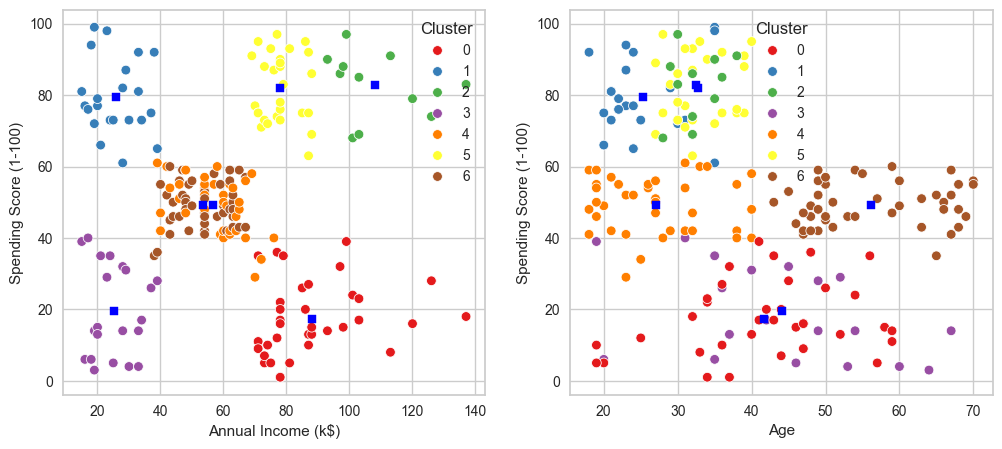

In [41]:
fig11, axes = plt.subplots(1, 2, figsize=(12, 5))

# Annual Income vs Spending Score
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=KM_7_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[0],
    legend='full'
)

# Age vs Spending Score
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=KM_7_clustered,
    hue='Cluster',
    palette='Set1',
    ax=axes[1],
    legend='full'
)

# plotting centroids
axes[0].scatter(
    KM_7_clusters.cluster_centers_[:, 1],
    KM_7_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

axes[1].scatter(
    KM_7_clusters.cluster_centers_[:, 0],
    KM_7_clusters.cluster_centers_[:, 2],
    marker='s', s=40, c='blue'
)

plt.show()


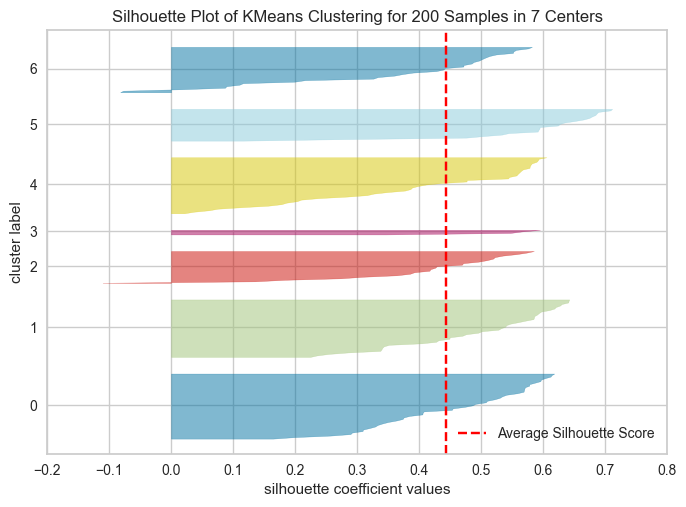

In [42]:
model = KMeans(n_clusters=7, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [45]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

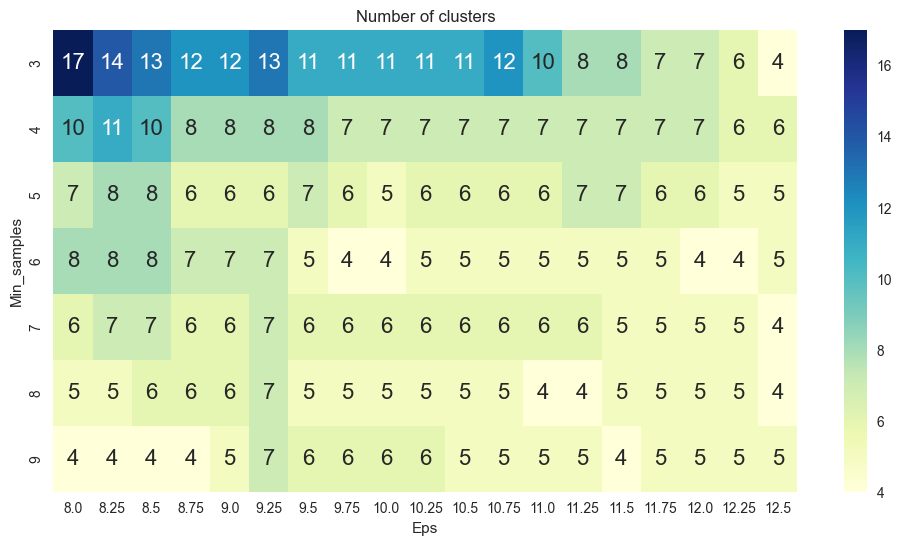

In [46]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

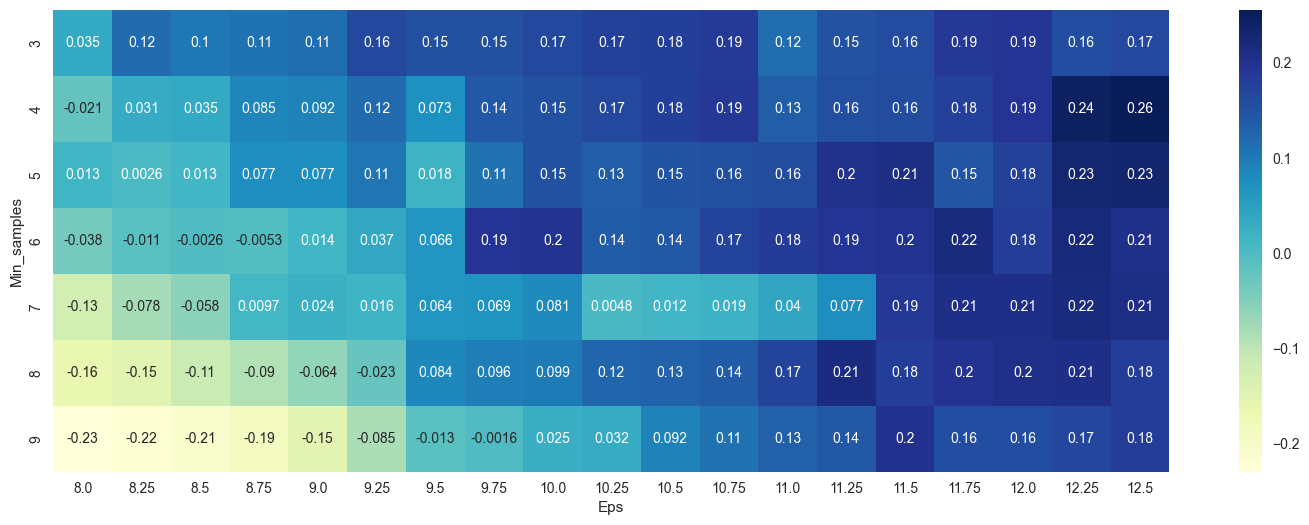

In [47]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [60]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [61]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


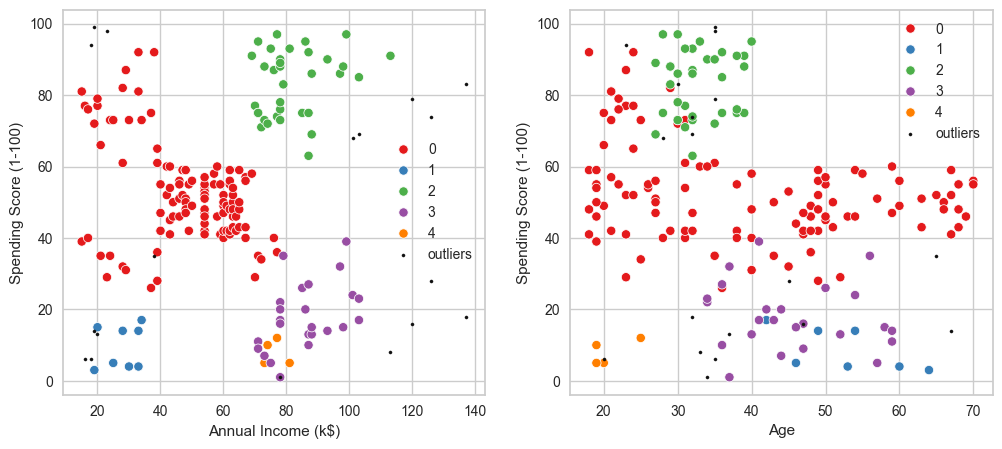

In [62]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# График 1: Annual Income vs Spending Score без выбросов
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
    hue='Cluster',
    palette='Set1',
    ax=axes[0],
    legend='full',
    s=45
)

# График 2: Age vs Spending Score без выбросов
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
    hue='Cluster',
    palette='Set1',
    ax=axes[1],
    legend='full',
    s=45
)

# Отображение выбросов чёрными точками
axes[0].scatter(
    outliers['Annual Income (k$)'],
    outliers['Spending Score (1-100)'],
    s=5,
    label='outliers',
    c='k'
)
axes[1].scatter(
    outliers['Age'],
    outliers['Spending Score (1-100)'],
    s=5,
    label='outliers',
    c='k'
)

axes[0].legend()
axes[1].legend()

# Настройка размера шрифта легенды
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()
